<a href="https://colab.research.google.com/github/Shubham-urbanrise/Shubham-urbanrise/blob/Dev/SARIMAX_ad_campaign_CTR_spends_1st_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Data/raw/Copy of fbads_2124.csv")

In [4]:
## Start Date and Stop date are similar column
# Method 2: Using .ne() method
differences = df[df["Date Start"].ne(df["Date Stop"])]
print(differences)

Empty DataFrame
Columns: [Account Id, Account Name, Ad Id, Ad Name, Adset Id, Adset Name, Campaign Id, Campaign Name, Creative Media Type, Device Platform, Gender, Age, Outbound Clicks, Unique Clicks, Clicks, Conversions, Spend, Date Start, Date Stop, Reach, Frequency, Impressions, Image Name, Image URL]
Index: []

[0 rows x 24 columns]


In [5]:
df=df.drop("Date Stop",axis=1)

In [6]:
df["Date Start"] = pd.to_datetime(df["Date Start"])

In [7]:
# There is no significance of these columns for now, both have images only.
df=df.drop(["Account Id","Creative Media Type","Account Name"],axis=1)

In [8]:
df

,Ad Id,Ad Name,Adset Id,Adset Name,Campaign Id,Campaign Name,Device Platform,Gender,Age,Outbound Clicks,Unique Clicks,Clicks,Conversions,Spend,Date Start,Reach,Frequency,Impressions,Image Name,Image URL
0,23848965557600509,New Pizza IMG,23848956507370509,Bachupally (+15 KM) | OT | 27 - 60,23848956507320509,Bachupally | OT | Lead Gen,NaN,female,25-34,NaN,NaN,0,NaN,4.710000,2021-11-24,20,1.000000,20,Ad-2(1080x1920).png,https://www.facebook.com/ads/image/?d=AQL3D_uT...
1,23848965557600509,New Pizza IMG,23848956507370509,Bachupally (+15 KM) | OT | 27 - 60,23848956507320509,Bachupally | OT | Lead Gen,NaN,female,25-34,NaN,NaN,2,NaN,39.390000,2021-11-24,20,1.150000,23,Ad-2.png,https://www.facebook.com/ads/image/?d=AQI5WW7o...
2,23848965557600509,New Pizza IMG,23848956507370509,Bachupally (+15 KM) | OT | 27 - 60,23848956507320509,Bachupally | OT | Lead Gen,NaN,female,25-34,NaN,NaN,0,NaN,0.280000,2021-11-24,2,1.000000,2,Ad-2(1200x628).png,https://www.facebook.com/ads/image/?d=AQK1k40F...
3,23848965557600509,New Pizza IMG,23848956507370509,Bachupally (+15 KM) | OT | 27 - 60,23848956507320509,Bachupally | OT | Lead Gen,NaN,male,25-34,NaN,NaN,0,NaN,12.740000,2021-11-24,74,1.000000,74,Ad-2(1080x1920).png,https://www.facebook.com/ads/image/?d=AQL3D_uT...
4,23848965557600509,New Pizza IMG,23848956507370509,Bachupally (+15 KM) | OT | 27 - 60,23848956507320509,Bachupally | OT | Lead Gen,NaN,male,25-34,NaN,NaN,3,NaN,50.820000,2021-11-24,97,1.082474,105,Ad-2.png,https://www.facebook.com/ads/image/?d=AQI5WW7o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757186,23857468179850509,Experience 5Star Living Here - Rev,23852513462200509,OT | Hyderabad | 25 - 60,23852513462210509,Conversion | OT | Jan'8th 2023,NaN,male,45-54,NaN,NaN,0,NaN,0.010048,2024-06-17,1,1.000000,1,Artboard 3 (1).png_105,https://www.facebook.com/ads/image/?d=AQLTB60K...
757187,23857468179850509,Experience 5Star Living Here - Rev,23852513462200509,OT | Hyderabad | 25 - 60,23852513462210509,Conversion | OT | Jan'8th 2023,NaN,unknown,45-54,NaN,NaN,0,NaN,0.010048,2024-06-17,1,1.000000,1,Artboard 1 (2).png_105,https://www.facebook.com/ads/image/?d=AQKZNJjY...
757188,23857468179850509,Experience 5Star Living Here - Rev,23852513462200509,OT | Hyderabad | 25 - 60,23852513462210509,Conversion | OT | Jan'8th 2023,NaN,female,55-64,NaN,NaN,1,NaN,0.693316,2024-06-17,4,1.000000,4,Artboard 1 (2).png_105,https://www.facebook.com/ads/image/?d=AQKZNJjY...
757189,23857468179850509,Experience 5Star Living Here - Rev,23852513462200509,OT | Hyderabad | 25 - 60,23852513462210509,Conversion | OT | Jan'8th 2023,NaN,male,55-64,NaN,NaN,0,NaN,0.964613,2024-06-17,8,2.125000,17,Artboard 1 (2).png_105,https://www.facebook.com/ads/image/?d=AQKZNJjY...


In [9]:
df.columns

Index(['Ad Id', 'Ad Name', 'Adset Id', 'Adset Name', 'Campaign Id',
       'Campaign Name', 'Device Platform', 'Gender', 'Age', 'Outbound Clicks',
       'Unique Clicks', 'Clicks', 'Conversions', 'Spend', 'Date Start',
       'Reach', 'Frequency', 'Impressions', 'Image Name', 'Image URL'],
      dtype='object')

In [10]:
df['Campaign Name'].value_counts()

Campaign Name
Conversion | Prospective | 03Oct                                       129581
Conversion_OT_1st_November                                              40753
Lead Generation | Prospective | August '22                              28786
Lead Gen | New OT | Nov11                                               24194
Conversion | OT | Jan'8th 2023                                          23571
                                                                        ...  
New Bachupally | OT | Lead Gen                                             32
Prospective - Investment | Hyderabad | Lead Gen | IG Feed + Explore        24
Prospective - LLA | Hyderabad | Lead Gen | IG Feed + Explore               23
Prospective - LLA | Hyderabad | Lead Gen | IG Stories                      21
Bachupally | Prospective - OT | IG Stories Lead Gen                        21
Name: count, Length: 166, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757191 entries, 0 to 757190
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Ad Id            757191 non-null  int64         
 1   Ad Name          757191 non-null  object        
 2   Adset Id         757191 non-null  int64         
 3   Adset Name       757191 non-null  object        
 4   Campaign Id      757191 non-null  int64         
 5   Campaign Name    757191 non-null  object        
 6   Device Platform  0 non-null       float64       
 7   Gender           757191 non-null  object        
 8   Age              757191 non-null  object        
 9   Outbound Clicks  0 non-null       float64       
 10  Unique Clicks    0 non-null       float64       
 11  Clicks           757191 non-null  int64         
 12  Conversions      0 non-null       float64       
 13  Spend            757191 non-null  float64       
 14  Date Start       757

In [12]:
import pandas as pd

# Assuming df is your DataFrame
# Get the top 20 campaigns based on their value counts
top_20_campaigns = df['Campaign Name'].value_counts().head(20).index

# Filter the DataFrame for the top 20 campaigns
filtered_df = df[df['Campaign Name'].isin(top_20_campaigns)]

# Group by 'Campaign Name' and 'Date Start', and aggregate the sums for the specified columns
grouped_df = filtered_df.groupby(['Campaign Name', 'Date Start']).agg({
    'Clicks': 'sum',
    'Spend': 'sum',
    'Reach': 'sum',
    'Impressions': 'sum'
}).reset_index()

# Print the resulting DataFrame
grouped_df


,Campaign Name,Date Start,Clicks,Spend,Reach,Impressions
0,Conversion | OT | 15'Nov,2022-11-15,6,274.690000,4924,5156
1,Conversion | OT | 15'Nov,2022-11-16,54,989.370000,20178,22094
2,Conversion | OT | 15'Nov,2022-11-17,52,991.890000,22440,24829
3,Conversion | OT | 15'Nov,2022-11-18,38,995.810001,21654,22884
4,Conversion | OT | 15'Nov,2022-11-19,44,985.870000,18726,20159
...,...,...,...,...,...,...
3836,Prospetive | Lux | Lead Gen | May'12th,2024-01-27,46,2850.289999,8504,9102
3837,Prospetive | Lux | Lead Gen | May'12th,2024-01-28,47,3242.779999,8209,8735
3838,Prospetive | Lux | Lead Gen | May'12th,2024-01-29,73,3038.860002,9354,9881
3839,Prospetive | Lux | Lead Gen | May'12th,2024-01-30,43,3020.319997,11348,12107


In [13]:
import pandas as pd
import plotly.express as px

# Assuming grouped_df is your DataFrame from the previous step
# Get the first campaign name from the top 20 campaigns
first_campaign = top_20_campaigns[1]

# Filter the grouped DataFrame for the first campaign
first_campaign_df = grouped_df[grouped_df['Campaign Name'] == first_campaign]

# Create a time series plot using Plotly
fig = px.line(first_campaign_df, x='Date Start', y='Clicks', title=f'Time Series of Clicks for {first_campaign}', labels={'Date Start': 'Date', 'Clicks': 'Clicks'})

# Show the plot
fig.show()


In [14]:
def get_missing_dates(grouped_df,first_campaign):
  # prompt: may i know the consecutive dates that are missing in missing dates
  # Filter the grouped DataFrame for the first campaign
  first_campaign_df = grouped_df[grouped_df['Campaign Name'] == first_campaign]

  # prompt: generate the code to know how many dates are missing from datestart

  # Get the minimum and maximum dates
  min_date = first_campaign_df['Date Start'].min()
  max_date = first_campaign_df['Date Start'].max()

  # Generate a sequence of dates from the minimum to maximum date
  date_range = pd.date_range(start=min_date, end=max_date)

  # Get the difference between the date range and the dates in the DataFrame
  missing_dates = date_range.difference(first_campaign_df['Date Start'])

  # Print the number of missing dates
  print(f"Number of missing dates for campaign {i} {first_campaign} with date range of {len(date_range)} is: {len(missing_dates)}")
  return missing_dates


In [15]:
def get_consecutive_missing_dates(missing_dates):
  # prompt: may i know the consecutive dates that are missing in missing dates
  # Convert the missing dates to a list
  missing_dates_list = missing_dates.to_list()

  # Initialize an empty list to store consecutive missing date sequences
  consecutive_missing_dates = []
  consecutive_missing_date_lengths = []

  # Iterate through the list of missing dates
  for i in range(len(missing_dates_list) - 1):
    # Check if the current missing date is one day after the previous missing date
    if missing_dates_list[i] + pd.DateOffset(1) == missing_dates_list[i + 1]:
      # If yes, check if consecutive_missing_dates is empty, if so initialize it with the previous date
      if not consecutive_missing_dates:
        consecutive_missing_dates.append([missing_dates_list[i]])
      # Then, add the current missing date to the current sequence
      consecutive_missing_dates[-1].append(missing_dates_list[i+1])
    else:
      # If not, and if consecutive_missing_dates is not empty, start a new sequence with the current missing date
      if consecutive_missing_dates:
        consecutive_missing_dates.append([missing_dates_list[i+1]])

  # Print the consecutive missing date sequences
  if consecutive_missing_dates:
    for sequence in consecutive_missing_dates:
      consecutive_missing_date_lengths.append((len(sequence), sequence[0]))
      # Print the tuple of (lengths of consecutive dates, start_date)
    print(consecutive_missing_date_lengths)
      #print(f"Consecutive missing dates: {sequence}")
  else:
    print("There are no consecutive missing dates.")
    return consecutive_missing_date_lengths





In [16]:
for i in range (20):
  first_campaign = top_20_campaigns[i]
  missing_dates = get_missing_dates(grouped_df,first_campaign)
  get_consecutive_missing_dates(missing_dates)

Number of missing dates for campaign 0 Conversion | Prospective | 03Oct with date range of 325 is: 35
[(2, Timestamp('2022-09-15 00:00:00')), (1, Timestamp('2022-10-04 00:00:00')), (1, Timestamp('2022-10-13 00:00:00')), (1, Timestamp('2022-11-03 00:00:00')), (3, Timestamp('2022-11-25 00:00:00')), (1, Timestamp('2022-12-08 00:00:00')), (3, Timestamp('2023-02-02 00:00:00')), (1, Timestamp('2023-03-26 00:00:00')), (8, Timestamp('2023-03-30 00:00:00')), (5, Timestamp('2023-04-10 00:00:00')), (2, Timestamp('2023-04-30 00:00:00')), (1, Timestamp('2023-05-05 00:00:00')), (1, Timestamp('2023-05-09 00:00:00')), (2, Timestamp('2023-06-17 00:00:00')), (3, Timestamp('2023-06-23 00:00:00'))]
Number of missing dates for campaign 1 Conversion_OT_1st_November with date range of 163 is: 1
There are no consecutive missing dates.
Number of missing dates for campaign 2 Lead Generation | Prospective | August '22 with date range of 139 is: 12
[(2, Timestamp('2022-09-15 00:00:00')), (1, Timestamp('2022-10-04

In [17]:

campaign = top_20_campaigns[1]
campaign_df = grouped_df[grouped_df['Campaign Name'] == campaign]

In [ ]:
campaign_df

,Campaign Name,Date Start,Clicks,Spend,Reach,Impressions
1015,Conversion_OT_1st_November,2023-11-01,110,1755.310001,21447,23486
1016,Conversion_OT_1st_November,2023-11-02,164,2909.910002,35301,39064
1017,Conversion_OT_1st_November,2023-11-03,160,2892.969996,49312,54620
1018,Conversion_OT_1st_November,2023-11-04,222,2864.690000,54000,57330
1019,Conversion_OT_1st_November,2023-11-05,240,3037.449997,66227,71399
...,...,...,...,...,...,...
1172,Conversion_OT_1st_November,2024-04-07,424,4523.530002,50640,58550
1173,Conversion_OT_1st_November,2024-04-08,348,4564.659998,54164,59739
1174,Conversion_OT_1st_November,2024-04-09,399,4538.889999,60239,67108
1175,Conversion_OT_1st_November,2024-04-10,396,4512.750000,56450,64585


In [18]:
# Calculate CTR
campaign_df.loc[:,'ctr'] = campaign_df.loc[:,'Clicks'] / campaign_df.loc[:,'Spend']
campaign_df.dropna(inplace=True)  # Drop rows where spend is zero to avoid division by zero

<ipython-input-18-a6548b7c8286>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-a6548b7c8286>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
campaign_df

,Campaign Name,Date Start,Clicks,Spend,Reach,Impressions,ctr
1015,Conversion_OT_1st_November,2023-11-01,110,1755.310001,21447,23486,0.062667
1016,Conversion_OT_1st_November,2023-11-02,164,2909.910002,35301,39064,0.056359
1017,Conversion_OT_1st_November,2023-11-03,160,2892.969996,49312,54620,0.055306
1018,Conversion_OT_1st_November,2023-11-04,222,2864.690000,54000,57330,0.077495
1019,Conversion_OT_1st_November,2023-11-05,240,3037.449997,66227,71399,0.079014
...,...,...,...,...,...,...,...
1172,Conversion_OT_1st_November,2024-04-07,424,4523.530002,50640,58550,0.093732
1173,Conversion_OT_1st_November,2024-04-08,348,4564.659998,54164,59739,0.076238
1174,Conversion_OT_1st_November,2024-04-09,399,4538.889999,60239,67108,0.087907
1175,Conversion_OT_1st_November,2024-04-10,396,4512.750000,56450,64585,0.087751


In [20]:
import pandas as pd
import plotly.express as px
# Create a time series plot for Impressions
fig_impressions = px.line(campaign_df, x='Date Start', y='ctr', title=f'Time Series of Impressions for {campaign}', labels={'Date Start': 'Date', 'CTR': 'ctr'})
fig_impressions.show()


# **Check Stationarity**

In [21]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')

# Check stationarity of CTR
adf_test(campaign_df['ctr'])


ADF Statistic: -3.412247671840652
p-value: 0.010548368164827408
Critical Value 1%: -3.472161410886292
Critical Value 5%: -2.8798954259680936
Critical Value 10%: -2.5765565828092245


# **Explaination**
The Augmented Dickey-Fuller (ADF) test is used to determine whether a time series is stationary. Here's how to interpret the results you provided:

1. **ADF Statistic**: -3.412247671840652
   - The ADF statistic is a negative number. Generally, more negative values indicate stronger evidence against the null hypothesis of a unit root (i.e., the series is non-stationary).

2. **p-value**: 0.010548368164827408
   - The p-value is the probability of obtaining a result at least as extreme as the one observed, assuming the null hypothesis is true. A lower p-value suggests stronger evidence against the null hypothesis.
   - In this case, the p-value is approximately 0.0105, which is less than typical significance levels such as 0.05 or 0.01. This means we reject the null hypothesis at the 5% and 1% significance levels.

3. **Critical Values**:
   - At 1%: -3.472161410886292
   - At 5%: -2.8798954259680936
   - At 10%: -2.5765565828092245
   - These are the critical values for different significance levels. If the ADF statistic is less than the critical value, we reject the null hypothesis.

Given these results:
- The ADF statistic (-3.412) is less than the 5% critical value (-2.880) but greater than the 1% critical value (-3.472).
- The p-value (0.0105) is less than 0.05 but slightly higher than 0.01.

**Conclusion**:
- At the 5% significance level, we reject the null hypothesis and conclude that the time series is stationary.
- At the 1% significance level, we do not have enough evidence to reject the null hypothesis, so we cannot conclusively say the series is stationary at this stricter level.

**Overall, there is strong evidence to suggest that the time series is stationary at the 5% significance level.**

# **ACF PCF test**

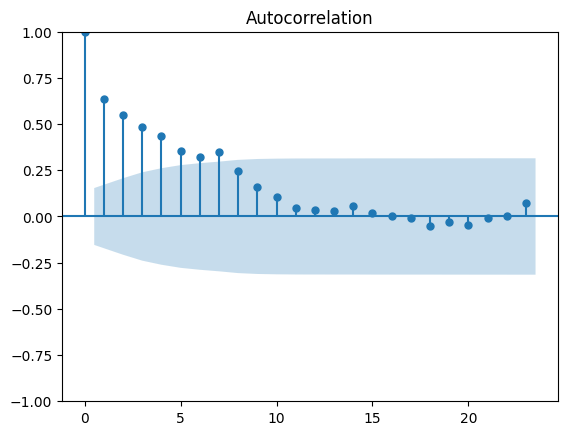

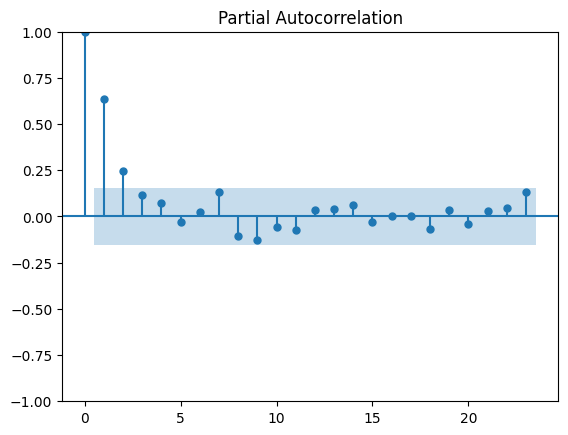

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for differenced CTR
plot_acf(campaign_df['ctr'].dropna())
plot_pacf(campaign_df['ctr'].dropna())
plt.show()


In [23]:
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import acf, pacf
import numpy as np

# Drop NA values from the CTR column
ctr_values = campaign_df['ctr'].dropna()

# Calculate ACF and PACF values
acf_values = acf(ctr_values, nlags=40)
pacf_values = pacf(ctr_values, nlags=40)

# Create ACF plot
acf_fig = go.Figure()
acf_fig.add_trace(go.Bar(
    x=np.arange(len(acf_values)),
    y=acf_values,
    name='ACF'
))
acf_fig.update_layout(
    title='Autocorrelation Function (ACF)',
    xaxis_title='Lag',
    yaxis_title='ACF'
)

# Create PACF plot
pacf_fig = go.Figure()
pacf_fig.add_trace(go.Bar(
    x=np.arange(len(pacf_values)),
    y=pacf_values,
    name='PACF'
))
pacf_fig.update_layout(
    title='Partial Autocorrelation Function (PACF)',
    xaxis_title='Lag',
    yaxis_title='PACF'
)

# Show plots
acf_fig.show()
pacf_fig.show()


# **Granger Casuality Test**

In [24]:
from statsmodels.tsa.stattools import grangercausalitytests

# Prepare the data for the test
df_gc = campaign_df[['ctr', 'Spend']].dropna()

# Perform the Granger causality test
granger_test_results = grangercausalitytests(df_gc, maxlag=10)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7643  , p=0.1860  , df_denom=158, df_num=1
ssr based chi2 test:   chi2=1.7978  , p=0.1800  , df=1
likelihood ratio test: chi2=1.7879  , p=0.1812  , df=1
parameter F test:         F=1.7643  , p=0.1860  , df_denom=158, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4248  , p=0.2437  , df_denom=155, df_num=2
ssr based chi2 test:   chi2=2.9415  , p=0.2297  , df=2
likelihood ratio test: chi2=2.9148  , p=0.2328  , df=2
parameter F test:         F=1.4248  , p=0.2437  , df_denom=155, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8122  , p=0.0031  , df_denom=152, df_num=3
ssr based chi2 test:   chi2=15.1013 , p=0.0017  , df=3
likelihood ratio test: chi2=14.4266 , p=0.0024  , df=3
parameter F test:         F=4.8122  , p=0.0031  , df_denom=152, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.9143  , p=0.0047  

# **Explaination**
The Granger Causality test is used to determine whether one time series can predict another time series. Here's how to interpret the results provided for different numbers of lags:

### Summary of Results:
1. **Number of lags (no zero) 1**:
   - All test statistics (F test, Chi2 test, likelihood ratio test) have high p-values (>0.18), indicating no evidence of Granger causality at this lag length.

2. **Number of lags (no zero) 2**:
   - All test statistics again have high p-values (>0.22), indicating no evidence of Granger causality at this lag length.

3. **Number of lags (no zero) 3**:
   - The p-values are low (<0.005) across all test statistics, indicating strong evidence of Granger causality at this lag length.

4. **Number of lags (no zero) 4**:
   - The p-values are low (<0.005) across all test statistics, indicating strong evidence of Granger causality at this lag length.

5. **Number of lags (no zero) 5**:
   - The p-values are low (<0.007) across all test statistics, indicating strong evidence of Granger causality at this lag length.

6. **Number of lags (no zero) 6**:
   - The p-values are low (<0.012) across all test statistics, indicating strong evidence of Granger causality at this lag length.

7. **Number of lags (no zero) 7**:
   - The p-values are below 0.05 across all test statistics, indicating evidence of Granger causality at this lag length.

8. **Number of lags (no zero) 8**:
   - The p-values are below 0.02 across all test statistics, indicating evidence of Granger causality at this lag length.

9. **Number of lags (no zero) 9**:
   - The p-values are below 0.03 across all test statistics, indicating evidence of Granger causality at this lag length.

10. **Number of lags (no zero) 10**:
    - The p-values are below 0.03 across all test statistics, indicating evidence of Granger causality at this lag length.

### Interpretation:
- **For lags 1 and 2**: The high p-values indicate that we fail to reject the null hypothesis of no Granger causality. There is no evidence that the first time series Granger-causes the second at these lag lengths.
- **For lags 3 to 10**: The low p-values indicate that we reject the null hypothesis of no Granger causality. There is strong evidence that the first time series Granger-causes the second at these lag lengths.

### Conclusion:
The results suggest that there is no Granger causality at shorter lag lengths (1 and 2). However, starting from lag 3 and continuing through lag 10, there is strong evidence that the first time series can predict the second time series. The choice of lag length can be important depending on the context and the nature of the data, but the significant results from lag 3 onwards indicate a predictive relationship between the series.

In [25]:
campaign_df

,Campaign Name,Date Start,Clicks,Spend,Reach,Impressions,ctr
1015,Conversion_OT_1st_November,2023-11-01,110,1755.310001,21447,23486,0.062667
1016,Conversion_OT_1st_November,2023-11-02,164,2909.910002,35301,39064,0.056359
1017,Conversion_OT_1st_November,2023-11-03,160,2892.969996,49312,54620,0.055306
1018,Conversion_OT_1st_November,2023-11-04,222,2864.690000,54000,57330,0.077495
1019,Conversion_OT_1st_November,2023-11-05,240,3037.449997,66227,71399,0.079014
...,...,...,...,...,...,...,...
1172,Conversion_OT_1st_November,2024-04-07,424,4523.530002,50640,58550,0.093732
1173,Conversion_OT_1st_November,2024-04-08,348,4564.659998,54164,59739,0.076238
1174,Conversion_OT_1st_November,2024-04-09,399,4538.889999,60239,67108,0.087907
1175,Conversion_OT_1st_November,2024-04-10,396,4512.750000,56450,64585,0.087751


# **SARIMAX Model**

In [29]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with 'date', 'clicks', and 'spend' columns
campaign_df['Date Start'] = pd.to_datetime(campaign_df['Date Start'])
campaign_df.set_index('Date Start', inplace=True)

# Calculate CTR
campaign_df['ctr'] = campaign_df['Clicks'] / campaign_df['Spend']
campaign_df.dropna(inplace=True)  # Drop rows where spend is zero to avoid division by zero
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to 'spend'
scaler = MinMaxScaler()
campaign_df['Spend_scaled'] = scaler.fit_transform(campaign_df[['Spend']])

campaign_df.head()

<ipython-input-29-0dfd185a6563>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-0dfd185a6563>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-0dfd185a6563>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Campaign Name,Clicks,Spend,Reach,Impressions,ctr,Spend_scaled
Date Start,,,,,,,
2023-11-01,Conversion_OT_1st_November,110,1755.310001,21447,23486,0.062667,0.028332
2023-11-02,Conversion_OT_1st_November,164,2909.910002,35301,39064,0.056359,0.097917
2023-11-03,Conversion_OT_1st_November,160,2892.969996,49312,54620,0.055306,0.096896
2023-11-04,Conversion_OT_1st_November,222,2864.690000,54000,57330,0.077495,0.095192
2023-11-05,Conversion_OT_1st_November,240,3037.449997,66227,71399,0.079014,0.105603


In [30]:
# Split the data into training and test sets
train_size = int(len(campaign_df) * 0.8)
train, test = campaign_df.iloc[:train_size], campaign_df.iloc[train_size:]


In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure there are no missing values
train = train.dropna(subset=['ctr', 'Spend_scaled'])
test = test.dropna(subset=['ctr', 'Spend_scaled'])

# Define the exogenous variable with significant lags
train_exog = train['Spend_scaled']
test_exog = test['Spend_scaled']

# Fit the ARIMAX model
model = SARIMAX(train['ctr'], exog=train_exog, order=(3, 0, 7))  # Adjust order based on ACF/PACF plots
model_fit = model.fit(disp=False)

print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                    ctr   No. Observations:                  129
Model:               SARIMAX(3, 0, 7)   Log Likelihood                 396.300
Date:                Fri, 28 Jun 2024   AIC                           -768.600
Time:                        09:47:40   BIC                           -734.282
Sample:                             0   HQIC                          -754.656
                                - 129                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Spend_scaled     0.0119      0.011      1.040      0.298      -0.010       0.034
ar.L1            0.3570      0.272      1.312      0.190      -0.176       0.890
ar.L2            0.1843      0.256      0.71

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



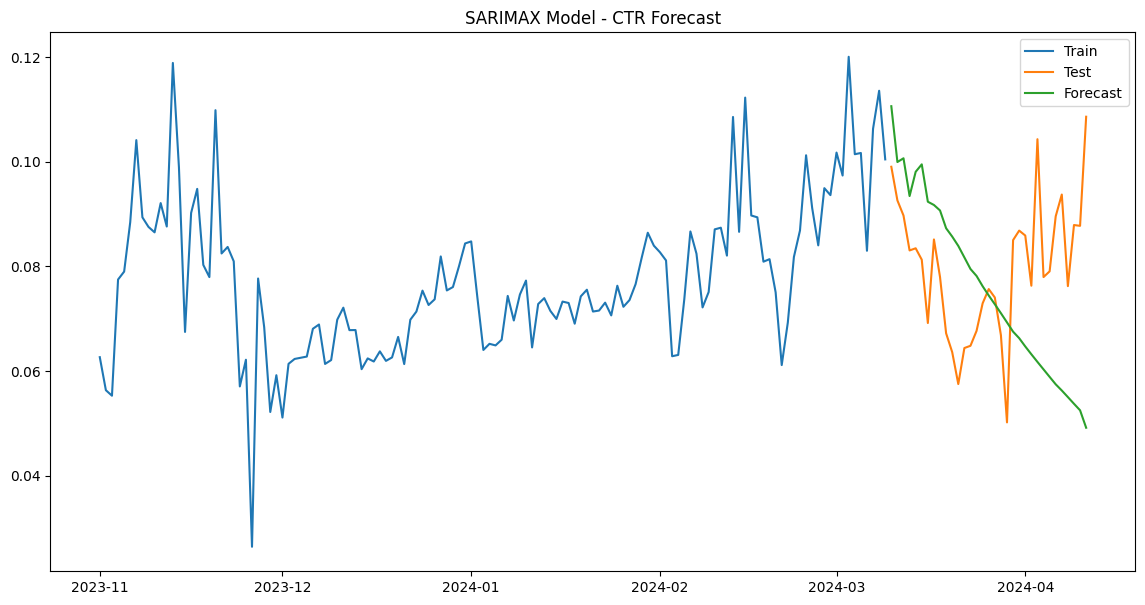

Mean Squared Error: 0.0005151081122336766


In [32]:
# Forecast
forecast = model_fit.forecast(steps=len(test), exog=test_exog)

# # Convert forecast to original scale (if differenced)
# forecast = forecast.cumsum() + train['ctr'].iloc[-1]

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train.index, train['ctr'], label='Train')
plt.plot(test.index, test['ctr'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('SARIMAX Model - CTR Forecast')
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['ctr'], forecast)
print(f'Mean Squared Error: {mse}')


# **RNN Model**

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Apply Min-Max Scaling to 'spend' and 'ctr'
scaler_spend = MinMaxScaler()


campaign_df['spend_scaled'] = scaler_spend.fit_transform(campaign_df[['Spend']])

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10  # Number of time steps to look back
features = campaign_df[['spend_scaled', 'ctr']].values
target = campaign_df['ctr'].values

X, y = create_sequences(features, seq_length)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


<ipython-input-33-2a29f8a9368e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(seq_length, 2)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [35]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
4/4 [==============================] - 7s 370ms/step - loss: 0.0606 - val_loss: 0.0103
Epoch 2/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0408 - val_loss: 0.0050
Epoch 3/50
4/4 [==============================] - 0s 30ms/step - loss: 0.0334 - val_loss: 0.0039
Epoch 4/50
4/4 [==============================] - 0s 40ms/step - loss: 0.0355 - val_loss: 0.0036
Epoch 5/50
4/4 [==============================] - 0s 30ms/step - loss: 0.0324 - val_loss: 0.0061
Epoch 6/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0327 - val_loss: 0.0077
Epoch 7/50
4/4 [==============================] - 0s 32ms/step - loss: 0.0325 - val_loss: 0.0052
Epoch 8/50
4/4 [==============================] - 0s 33ms/step - loss: 0.0317 - val_loss: 0.0041
Epoch 9/50
4/4 [==============================] - 0s 30ms/step - loss: 0.0320 - val_loss: 0.0041
Epoch 10/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0316 - val_loss: 0.0049
Epoch 11/50
4/4 [===========

In [43]:
# Predict and invert scaling
predictions = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


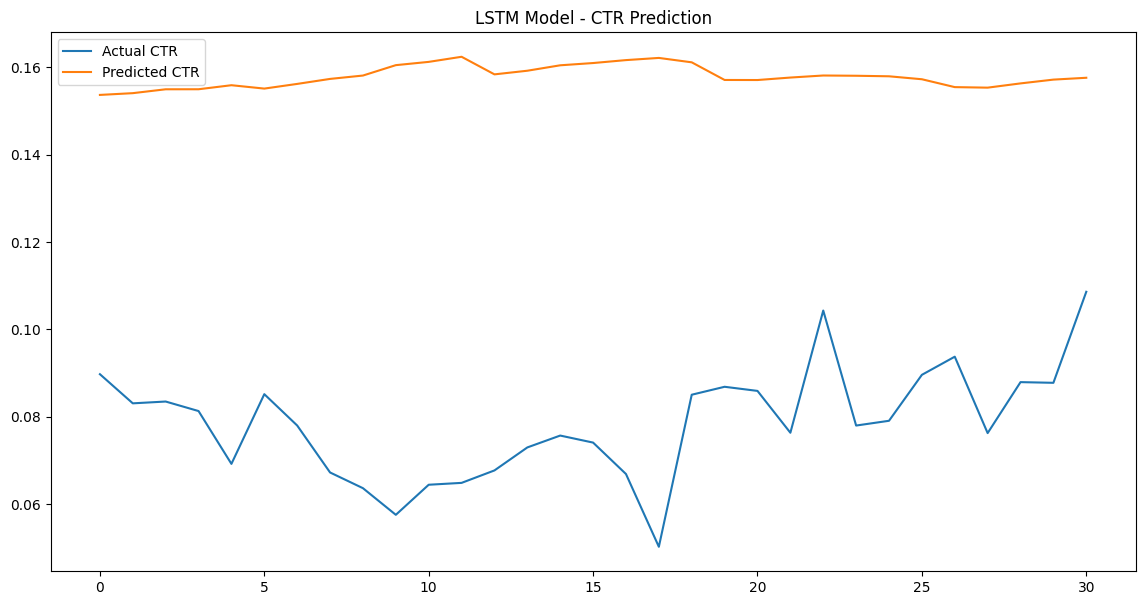

Mean Squared Error: 0.006487409550206375


In [46]:



# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test[:,1], label='Actual CTR')
plt.plot(predictions, label='Predicted CTR')
plt.legend()
plt.title('LSTM Model - CTR Prediction')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test[:,1], predictions)
print(f'Mean Squared Error: {mse}')
